In [1]:
from pprint import pprint

import matplotlib.pyplot as plt
import seaborn as sns

from cuhk_sysu_pedes.sysu_annotations import build_sysu_annotations_from_file
from cuhk_sysu_pedes.stat import (
    are_split_intersecting,
    counting_detections,
    counting_frames,
    counting_persons,
    counting_detections_by_person,
    counting_detections_by_frame,
    verify_distractors,
    galleries_have_100_detections,
)

In [2]:
# Set SNS theme and matplotlib rc
sns.set_theme(rc={"figure.figsize": (13, 6)})

In [3]:
# Get annotations from SYSU
annotations = build_sysu_annotations_from_file("./data/CUHK-SYSU/")
annotations_train = annotations[annotations.split_sysu == 'train']
annotations_test = annotations[annotations.split_sysu != 'train']


## Data analysis of CUHK-SYSU

This notebook checks the basic stats of the CUHK-SYSU dataset. [Paper](https://arxiv.org/abs/1604.01850v3) [GitHub](https://github.com/ShuangLI59/person_search)



### Train samples

**Reminder**, train data are grouped into set of frames by person ID. Each frame is annotated with the detection of the corresponding person ID.

We will get all the stat of detections, frames and person.

Plus, we provide the stat of the detections by person. Note, detections by person and frames by person are the same stat because there is only one person per frame.

Finally, we will get stat by frame. We want to know how many detections there are by frame.


##### Overall


In [4]:
# Get informations from training data

n_detections_train = counting_detections(annotations_train)
n_frames_train = counting_frames(annotations_train)
n_persons_train = counting_persons(annotations_train)

print(f"{n_detections_train = :,}")
print(f"{n_frames_train = :,}")
print(f"{n_persons_train = :,}")

n_detections_train = 15,080
n_frames_train = 9,716
n_persons_train = 5,532


##### Detections by person

In [5]:
# Count detections by persons
count_detections_by_person = counting_detections_by_person(annotations_train)

In [6]:
# Print detections by persons
print(f"{' Detections by person ':-^80s}\n")
pprint({
    key: value
    for key,value in count_detections_by_person.items()
    if key != "COUNT" # Not interesting to print
}, sort_dicts=False)

----------------------------- Detections by person -----------------------------

{'STAT': {'MEAN': 2.7259580621836585,
          'STD': 1.076243057171904,
          'CENTERED 1 STD': {'COUNT': 4591, 'PROPORTION': 0.8298987707881417}},
 'EQUALS TO': {2: {'COUNT': 3061, 'PROPORTION': 0.5533261026753434},
               3: {'COUNT': 1530, 'PROPORTION': 0.2765726681127983},
               4: {'COUNT': 568, 'PROPORTION': 0.10267534345625452}},
 'PROPORTION 4 AND BELOW': 0.9325741142443963}


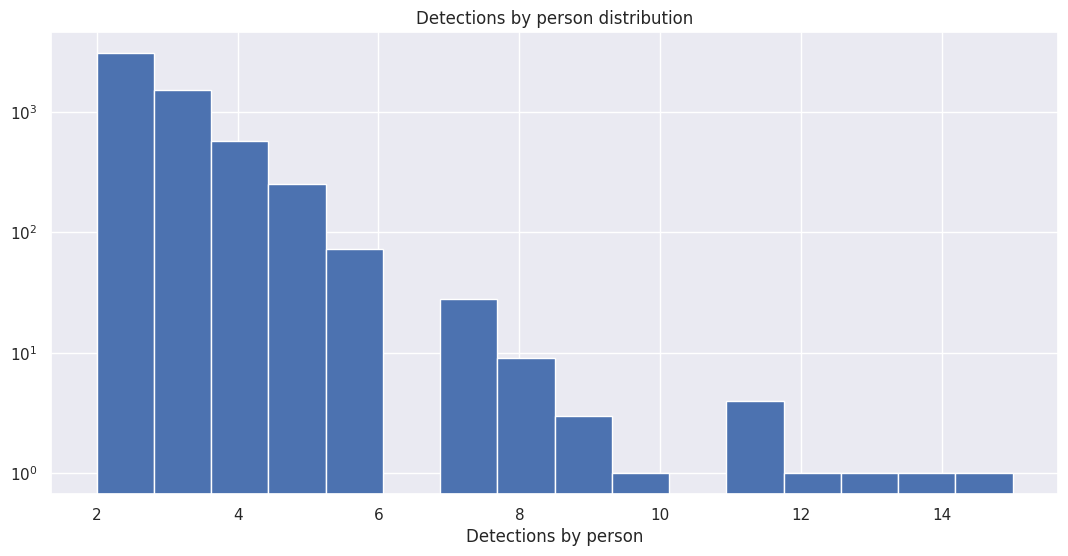

In [7]:
count_detections_by_person["COUNT"].hist(bins=16)

plt.yscale("log")
plt.title("Detections by person distribution")
plt.xlabel("Detections by person")
plt.show()


##### Detections by frame

In [8]:
# Count detections by frame
count_detections_by_frame = counting_detections_by_frame(annotations_train)

In [9]:
# Print detections by persons
print(f"{' Detections by frame ':-^80s}\n")
pprint({
    key: value
    for key,value in count_detections_by_frame.items()
    if key != "COUNT" # Not interesting to print
}, sort_dicts=False)

----------------------------- Detections by frame ------------------------------

{'STAT': {'MEAN': 1.552079044874434,
          'STD': 0.805452852634555,
          'CENTERED 1 STD': {'COUNT': 8693, 'PROPORTION': 0.894709757101688}},
 'EQUALS TO': {1: {'COUNT': 5756, 'PROPORTION': 0.5924248662000824},
               2: {'COUNT': 2937, 'PROPORTION': 0.3022848909016056},
               3: {'COUNT': 746, 'PROPORTION': 0.07678056813503499}},
 'PROPORTION 3 AND BELOW': 0.971490325236723}


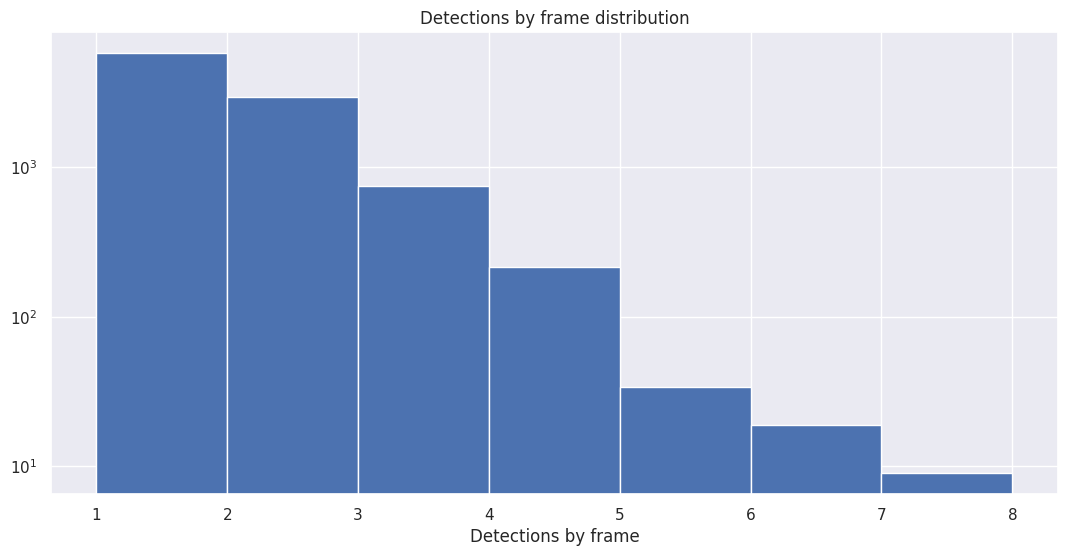

In [10]:
count_detections_by_frame["COUNT"].hist(bins=list(range(1, 9)))

plt.yscale("log")
plt.title("Detections by frame distribution")
plt.xlabel("Detections by frame")
plt.show()



##### Not fitting the dataset

We see there are some figures that are not showing compared to the paper. [We provide a notebook to understand the gap](./train_different_from_paper.ipynb). The conclusion is that our stat of persons are the same of PEDES. **But**, SYSU have 4 more train detections compared to train detections in PEDES. Those detections would be removed during the fusion process.



### Test samples

Test samples are organized as a person ID have 1 query and 100 galleries. A query is an annotated detection and a gallery is composed by unannotated detections (distractors) and annotated detections containing the person from the query.

The stat are similar from the [train samples](#train-samples).

In [11]:
# Get only annotated annotations e.g. no distractor
annotations_test_annotated = annotations_test.dropna()

##### Overall

In [12]:
# Get informations from training data

n_detections_test = counting_detections(annotations_test_annotated)
n_frames_test = counting_frames(annotations_test_annotated)
n_persons_test = counting_persons(annotations_test_annotated)

print(f"{n_detections_test = :,}")
print(f"{n_frames_test = :,}")
print(f"{n_persons_test = :,}")


n_detections_test = 8,341
n_frames_test = 6,978
n_persons_test = 2,900


##### Split does not intersect

In [13]:
print(f"There are common detections between splits: {are_split_intersecting(annotations_train, annotations_test)}")

There are common detections between splits: False


##### Detections by person

In [14]:
# Count detections by person
count_detections_by_person = counting_detections_by_person(annotations_test_annotated)

In [15]:
# Print detections by persons
print(f"{' Detections by person ':-^80s}\n")
pprint({
    key: value
    for key,value in count_detections_by_person.items()
    if key != "COUNT" # Not interesting to print
}, sort_dicts=False)


----------------------------- Detections by person -----------------------------

{'STAT': {'MEAN': 2.8762068965517242,
          'STD': 1.3347271156378986,
          'CENTERED 1 STD': {'COUNT': 2646, 'PROPORTION': 0.9124137931034483}},
 'EQUALS TO': {2: {'COUNT': 1503, 'PROPORTION': 0.5182758620689655},
               3: {'COUNT': 805, 'PROPORTION': 0.2775862068965517},
               4: {'COUNT': 338, 'PROPORTION': 0.11655172413793104}},
 'PROPORTION 4 AND BELOW': 0.9124137931034483}


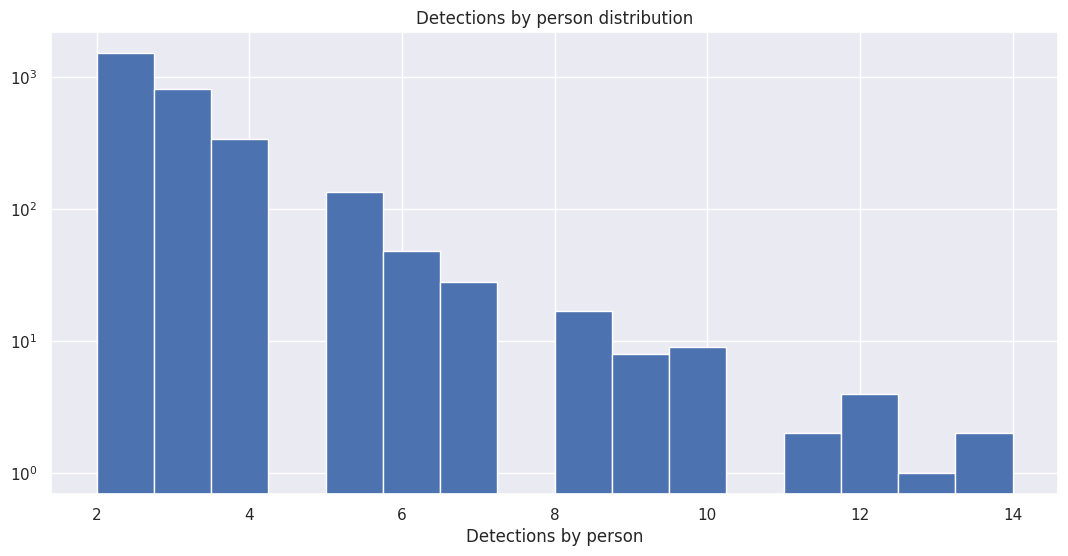

In [16]:
count_detections_by_person["COUNT"].hist(bins=16)

plt.yscale("log")
plt.title("Detections by person distribution")
plt.xlabel("Detections by person")
plt.show()



##### Detections by frames


In [17]:
# Count detections by frame
count_detections_by_frame = counting_detections_by_frame(annotations_test_annotated)

In [18]:
# Print detections by persons
print(f"{' Detections by frame ':-^80s}\n")
pprint({
    key: value
    for key,value in count_detections_by_frame.items()
    if key != "COUNT" # Not interesting to print
}, sort_dicts=False)

----------------------------- Detections by frame ------------------------------

{'STAT': {'MEAN': 1.1953281742619661,
          'STD': 0.4729712828298078,
          'CENTERED 1 STD': {'COUNT': 5810, 'PROPORTION': 0.8326167956434508}},
 'EQUALS TO': {1: {'COUNT': 5810, 'PROPORTION': 0.8326167956434508},
               2: {'COUNT': 1006, 'PROPORTION': 0.14416738320435654},
               3: {'COUNT': 133, 'PROPORTION': 0.019059902550874176}},
 'PROPORTION 3 AND BELOW': 0.9958440813986815}


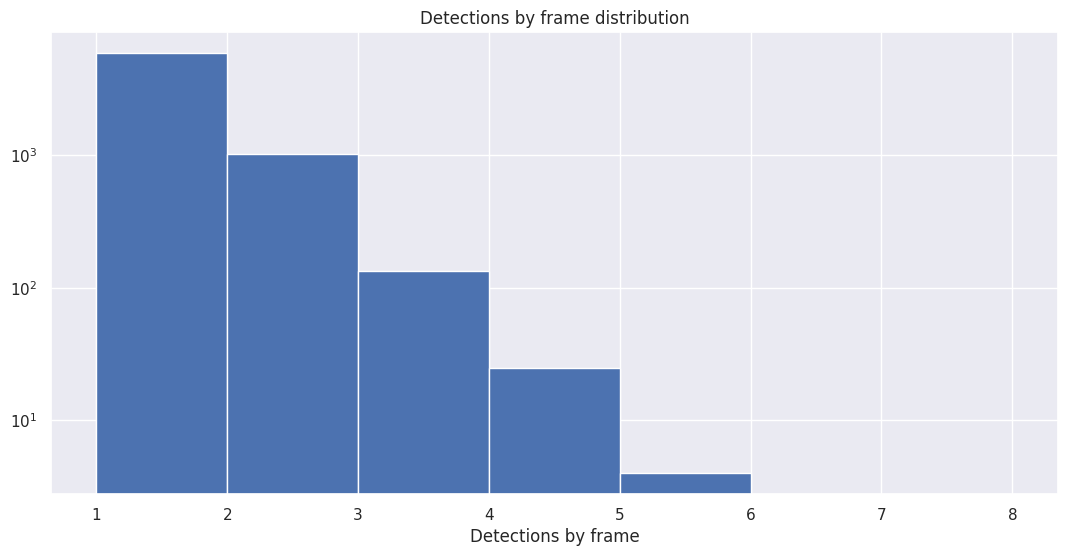

In [19]:
count_detections_by_frame["COUNT"].hist(bins=list(range(1, 9)))

plt.yscale("log")
plt.title("Detections by frame distribution")
plt.xlabel("Detections by frame")
plt.show()

## Unlabeled data 

Some of the detections - *raw frames* - does not have annotations of the people (detection, person id). Those are distractor frames in the gallery. 

We can count the number of frame and the number of detections. Also we ensure that there is no overlap between indices of distractors and annotated detections. Finally, we check if there is distractor data in query.


In [20]:
print(f"{' Verify distractors ':-^40s}")
pprint(verify_distractors(annotations_test), sort_dicts=False, width=40)

---------- Verify distractors ----------
{'DISTRACTOR IN QUERY': False,
 'COUNT FRAME': {'TOTAL': 284555,
                 'UNIQUE': 6978},
 'HAVE COMMON INDEX': False}


## Verify galleries' sizes

Because of the removal of duplicates in the [`preprocess.py`](../../lib/preprocess.py), we are not sure about the size of the galleries.

In [21]:
print(
    f"{galleries_have_100_detections(annotations_test) = }\n"
)

galleries_have_100_detections(annotations_test) = True

